In [207]:
import pandas as pd
import numpy as np
import os

Merging the data sets and tables into one single table.

In [152]:
import pandas as pd

xlsx_file1 = 'odds22.xlsx'
xlsx_file2 = 'odds23.xlsx'
xlsx_file3 = 'odds24.xlsx'
sheet_names1 = pd.ExcelFile(xlsx_file1).sheet_names
sheet_names2 = pd.ExcelFile(xlsx_file2).sheet_names
sheet_names3 = pd.ExcelFile(xlsx_file3).sheet_names

dfs = []

for sheet in sheet_names1:
    df1 = pd.read_excel(xlsx_file1, sheet_name=sheet)
    df2 = pd.read_excel(xlsx_file2, sheet_name=sheet)
    df3 = pd.read_excel(xlsx_file3, sheet_name=sheet)

    dfs.append(df1)
    dfs.append(df2)
    dfs.append(df3)

odds_original = pd.concat(dfs, ignore_index=True)
odds_original.head()


Exception ignored in: <function ZipFile.__del__ at 0x7dfbdcfc6320>
Traceback (most recent call last):
  File "/usr/lib/python3.10/zipfile.py", line 1819, in __del__
    def __del__(self):
KeyboardInterrupt: 


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,2021-08-13,20:00:00,Brentford,Arsenal,2,0,H,1.0,0.0,...,1.62,0.50,1.75,2.05,1.81,2.13,2.05,2.17,1.80,2.09
1,E0,2021-08-14,12:30:00,Man United,Leeds,5,1,H,1.0,0.0,...,2.25,-1.00,2.05,1.75,2.17,1.77,2.19,1.93,2.10,1.79
2,E0,2021-08-14,15:00:00,Burnley,Brighton,1,2,A,1.0,0.0,...,1.62,0.25,1.79,2.15,1.81,2.14,1.82,2.19,1.79,2.12
3,E0,2021-08-14,15:00:00,Chelsea,Crystal Palace,3,0,H,2.0,0.0,...,1.94,-1.50,2.05,1.75,2.12,1.81,2.16,1.93,2.06,1.82
4,E0,2021-08-14,15:00:00,Everton,Southampton,3,1,H,0.0,1.0,...,1.67,-0.50,2.05,1.88,2.05,1.88,2.08,1.90,2.03,1.86


Cleaning the rows with empty fields.

In [153]:
odds = odds_original.copy()
odds.replace('', np.nan, inplace=True)
odds.dropna(inplace=True)

In [154]:
odds_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22075 entries, 0 to 22074
Columns: 106 entries, Div to AvgCAHA
dtypes: datetime64[ns](1), float64(94), int64(2), object(9)
memory usage: 17.9+ MB


In [155]:
odds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6888 entries, 0 to 9494
Columns: 106 entries, Div to AvgCAHA
dtypes: datetime64[ns](1), float64(94), int64(2), object(9)
memory usage: 5.6+ MB


Number of games per league.

In [156]:
odds["Div"].value_counts()

Div
E1     1392
E3     1373
E2     1372
E0      939
SC0     563
SC1     445
SC3     411
SC2     393
Name: count, dtype: int64

In [157]:
odds.describe()

,Date,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
count,6888,6888.000000,6888.000000,6888.000000,6888.000000,6888.000000,6888.000000,6888.000000,6888.000000,6888.000000,...,6888.000000,6888.000000,6888.000000,6888.000000,6888.000000,6888.000000,6888.000000,6888.00000,6888.000000,6888.000000
mean,2022-10-02 17:10:39.721254656,1.465012,1.186121,0.660279,0.521487,12.633420,10.737224,4.428862,3.751016,10.692799,...,1.877625,-0.239620,1.929781,1.936536,1.945158,1.951591,1.996630,2.00100,1.911447,1.912677
min,2021-07-31 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.360000,-3.000000,1.580000,1.580000,1.650000,1.610000,1.770000,1.65000,1.670000,1.600000
25%,2022-02-08 00:00:00,1.000000,0.000000,0.000000,0.000000,9.000000,7.000000,3.000000,2.000000,8.000000,...,1.680000,-0.500000,1.850000,1.860000,1.870000,1.880000,1.920000,1.92000,1.840000,1.840000
50%,2022-10-09 00:00:00,1.000000,1.000000,0.000000,0.000000,12.000000,10.000000,4.000000,3.000000,11.000000,...,1.830000,-0.250000,1.930000,1.940000,1.940000,1.940000,2.000000,2.00000,1.910000,1.910000
75%,2023-04-15 00:00:00,2.000000,2.000000,1.000000,1.000000,16.000000,14.000000,6.000000,5.000000,13.000000,...,1.990000,0.250000,2.000000,2.020000,2.020000,2.030000,2.070000,2.08000,1.980000,1.980000
max,2024-01-02 00:00:00,9.000000,9.000000,5.000000,4.000000,39.000000,39.000000,17.000000,16.000000,24.000000,...,4.180000,2.500000,2.350000,2.350000,2.480000,2.380000,2.850000,2.54000,2.420000,2.230000
std,NaN,1.254790,1.139557,0.823378,0.732060,5.127861,4.690979,2.400666,2.231030,3.457892,...,0.299401,0.639656,0.100017,0.099538,0.101361,0.101732,0.098695,0.10218,0.089800,0.090163


Attribute histograms.

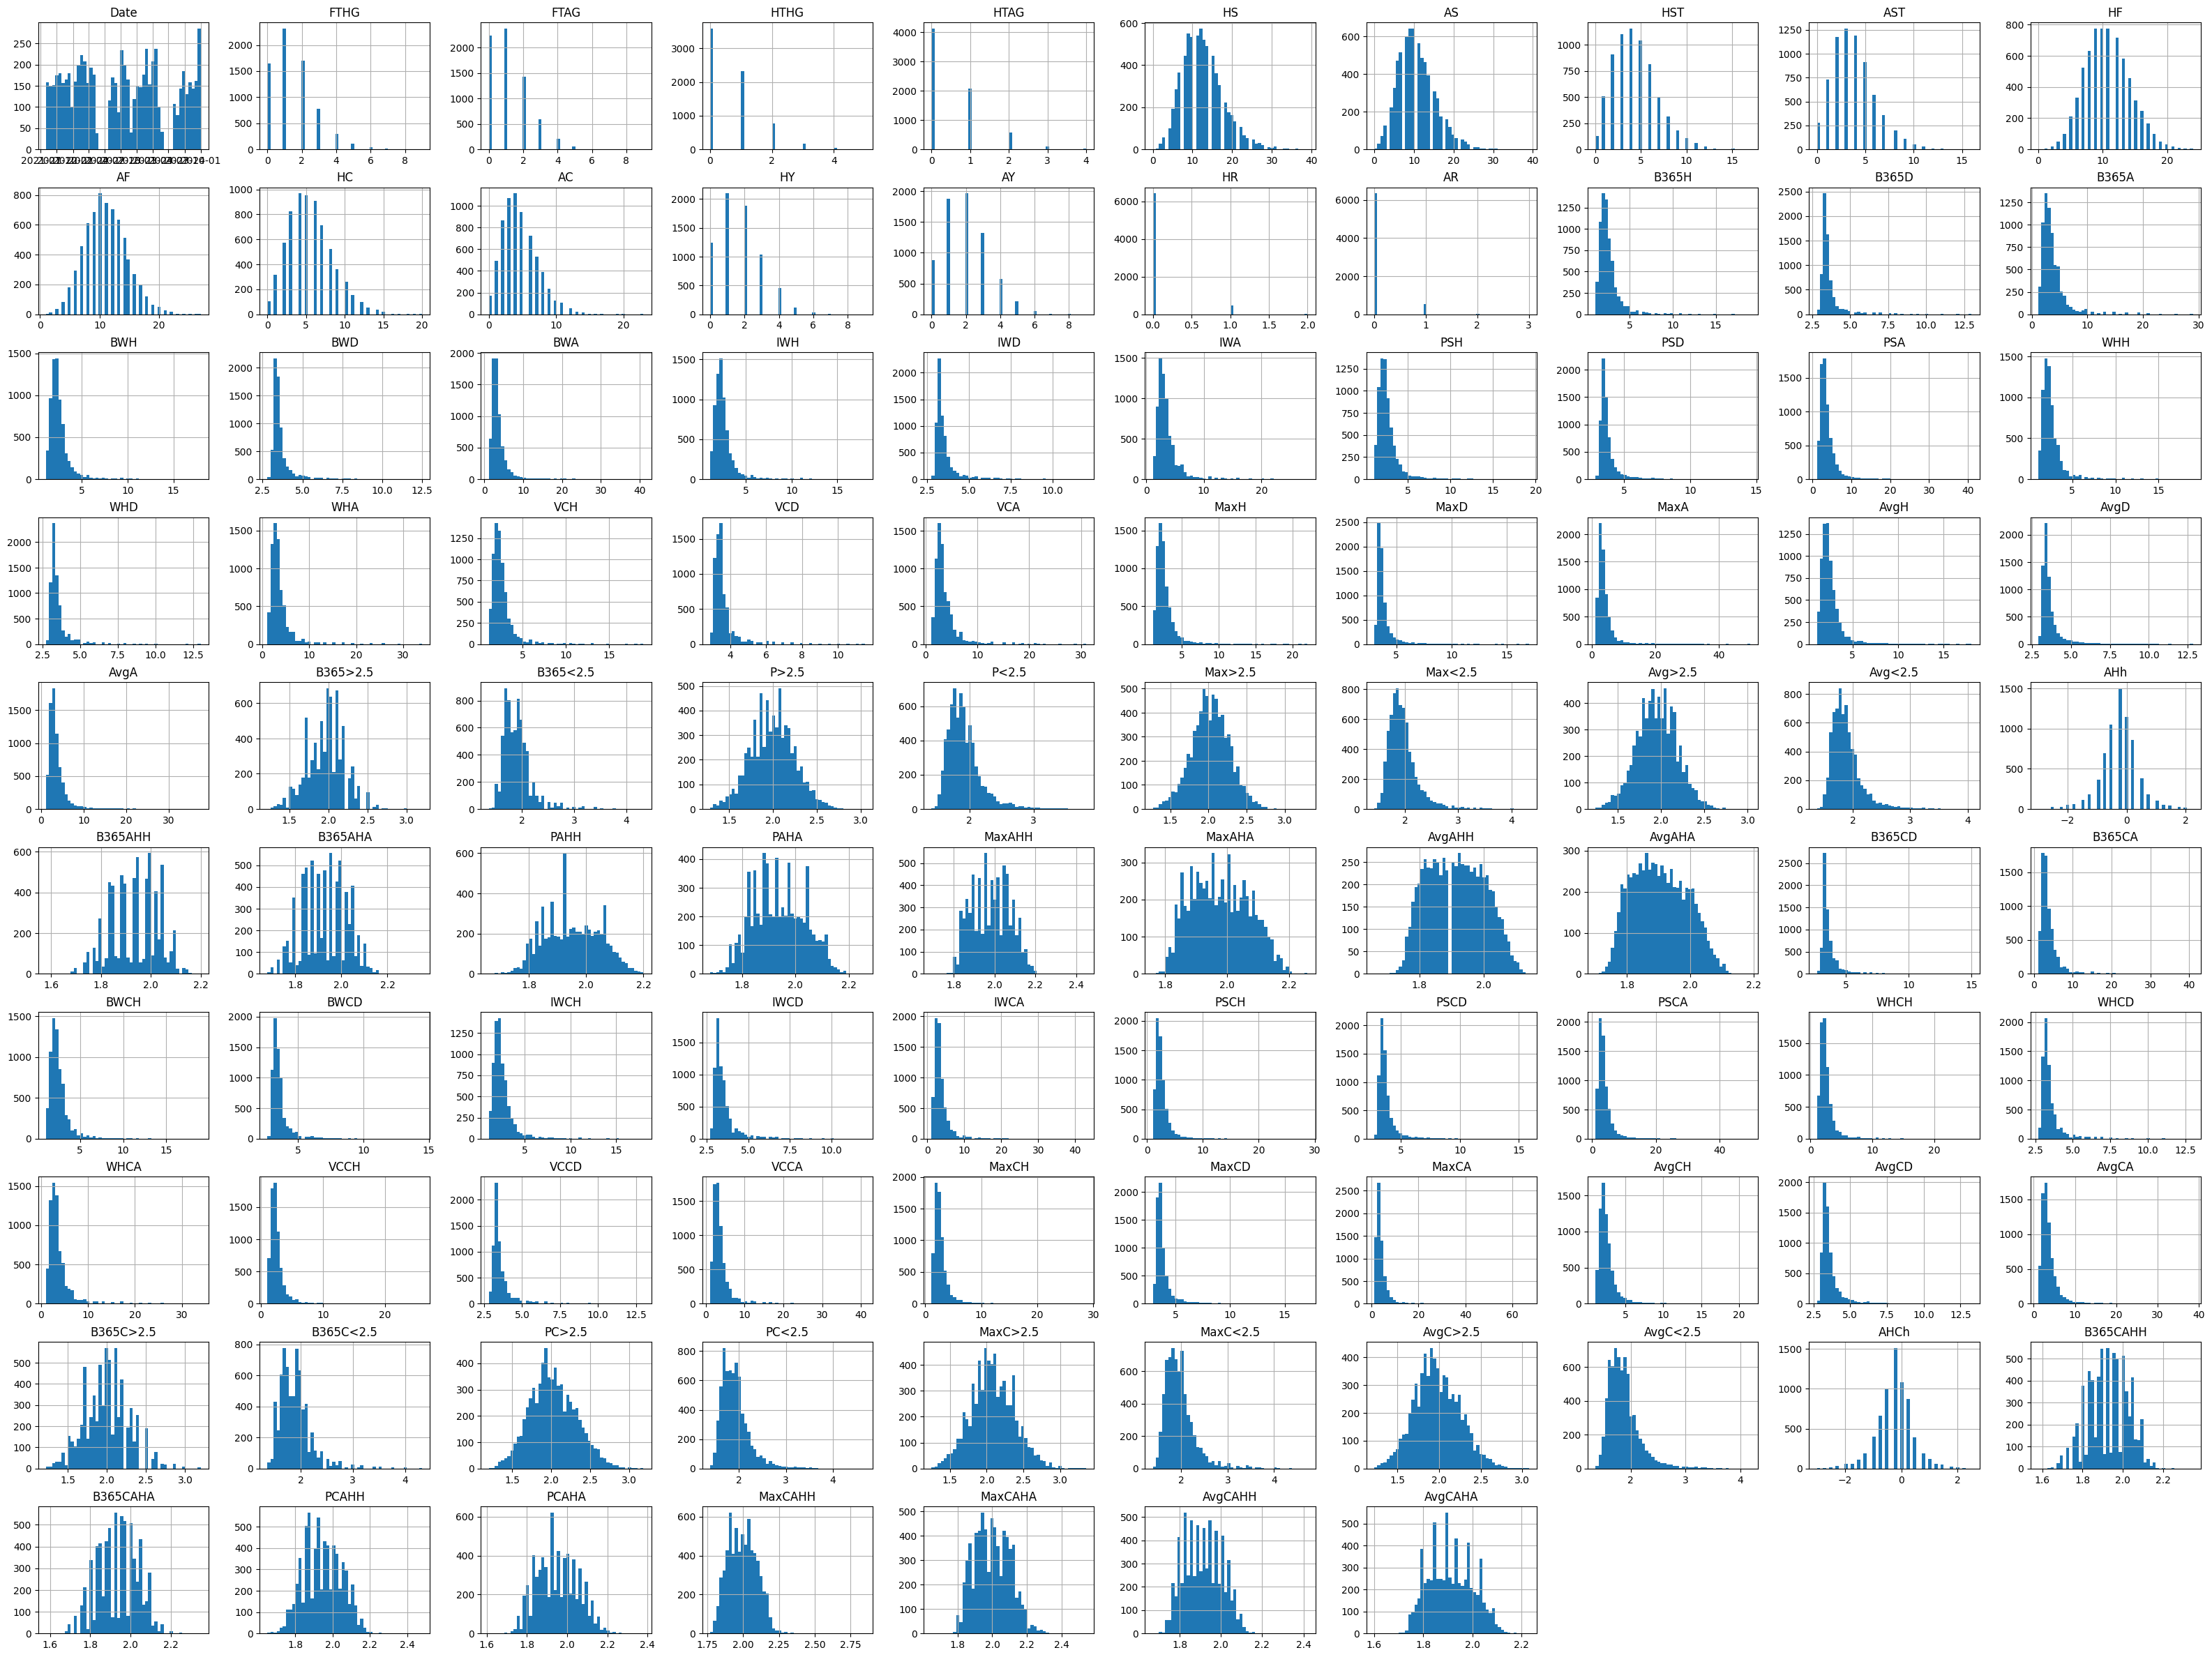

In [158]:
%matplotlib inline
import matplotlib.pyplot as plt

odds.hist(bins=50, figsize=(40, 30))
plt.savefig("odds_histogram.png")
plt.show()


Histogram showing home and away shots.

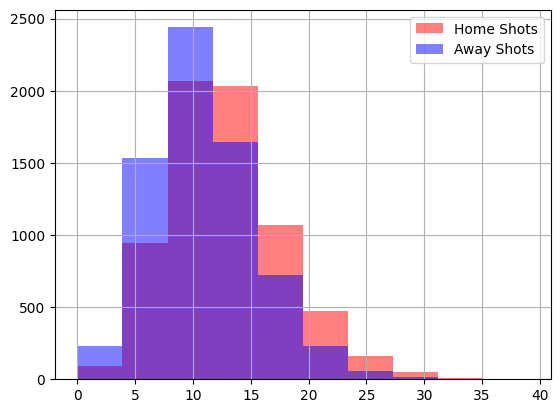

In [159]:
odds["HS"].hist(color='red', alpha=0.5, label='Home Shots')

odds["AS"].hist(color='blue', alpha=0.5, label='Away Shots')

plt.legend()
plt.show()

Histogram showing home and away fouls.

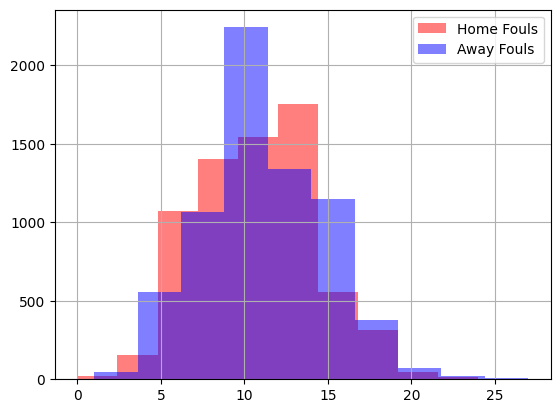

In [160]:
odds["HF"].hist(color='red', alpha=0.5, label='Home Fouls')

odds["AF"].hist(color='blue', alpha=0.5, label='Away Fouls')

plt.legend()
plt.show()

Visualizing the number of shots and the number of shots on target, for both home and away.

<Axes: xlabel='HS', ylabel='HST'>

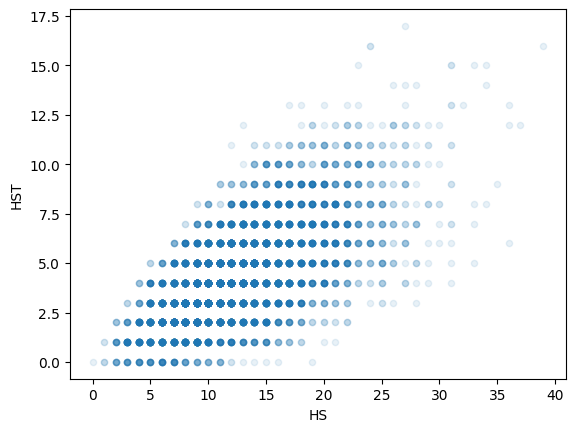

In [161]:
odds.plot(kind="scatter", x="HS", y="HST", alpha=0.1)

<Axes: xlabel='AS', ylabel='AST'>

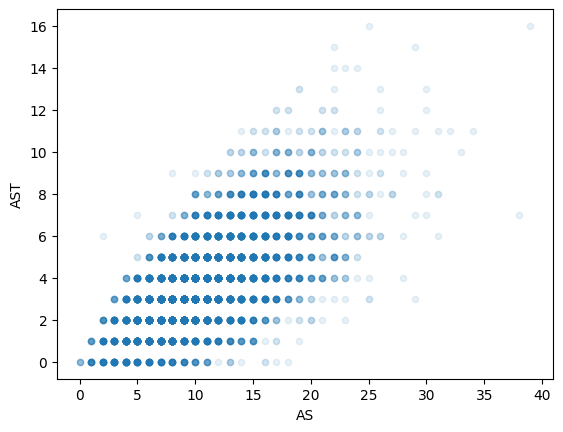

In [162]:
odds.plot(kind="scatter", x="AS", y="AST", alpha=0.1)

Digitizing the data.

In [163]:
digitized_odds = odds.copy()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(digitized_odds['Div'])
digitized_odds_encoded = le.transform(digitized_odds['Div'])

digitized_odds['Div'],digitized_odds_encoded

(0        E0
 1        E0
 2        E0
 3        E0
 4        E0
        ... 
 9490    SC3
 9491    SC3
 9492    SC3
 9493    SC3
 9494    SC3
 Name: Div, Length: 6888, dtype: object,
 array([0, 0, 0, ..., 7, 7, 7]))

In [164]:
le.classes_

array(['E0', 'E1', 'E2', 'E3', 'SC0', 'SC1', 'SC2', 'SC3'], dtype=object)

In [165]:
data_1 = digitized_odds.apply(le.fit_transform)

In [166]:
data_1

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,0,6,24,20,8,2,0,2,1,0,...,25,14,6,36,16,47,28,41,12,40
1,0,7,2,79,71,5,1,2,1,0,...,88,8,36,6,52,11,42,17,42,10
2,0,7,9,24,21,1,2,0,1,0,...,25,13,10,45,16,48,5,43,11,43
3,0,7,9,31,40,3,0,2,2,0,...,57,6,36,6,47,15,39,17,38,13
4,0,7,9,50,117,3,1,2,0,1,...,30,10,36,19,40,22,31,14,35,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9490,7,517,9,118,126,3,0,2,1,0,...,54,9,24,24,28,26,18,17,21,16
9491,7,517,9,121,49,2,0,2,1,0,...,53,6,34,9,43,10,32,4,33,5
9492,7,523,9,33,121,1,2,0,0,1,...,60,15,29,19,28,27,33,17,25,13
9493,7,523,9,49,98,2,1,2,1,0,...,59,15,21,26,31,23,19,19,17,19


Creating the correlations matrix.

In [167]:
corr_matrix = data_1.corr()

Looking for correlations on home yellow cards.

In [168]:
corr_matrix["HY"].sort_values(ascending=False)

HY       1.000000
HF       0.319968
AY       0.140204
BWCH     0.123922
AHh      0.121708
           ...   
MaxCA   -0.126999
PSA     -0.127103
AvgA    -0.127471
PSCA    -0.130290
AvgCA   -0.130332
Name: HY, Length: 106, dtype: float64

Looking for correlations on home red cards.

In [169]:
corr_matrix["HR"].sort_values(ascending=False)

HR      1.000000
AST     0.129219
FTAG    0.125789
AS      0.124934
AC      0.094555
          ...   
FTHG   -0.064013
HC     -0.074935
HST    -0.088788
HS     -0.116402
FTR    -0.117953
Name: HR, Length: 106, dtype: float64

Looking for correlations on Half-Time result.

In [170]:
corr_matrix["HTR"].sort_values(ascending=False)

HTR       1.000000
HTHG      0.661149
FTR       0.584028
FTHG      0.456946
IWCA      0.261686
            ...   
VCCH     -0.260651
B365CH   -0.261535
AST      -0.262286
FTAG     -0.449646
HTAG     -0.655692
Name: HTR, Length: 106, dtype: float64

Looking for correletions on Full-Time result.

In [185]:
corr_matrix["FTR"].sort_values(ascending=False)

FTR       1.000000
FTHG      0.623177
HTR       0.584028
HTHG      0.420514
HST       0.377218
            ...   
VCCH     -0.352494
B365CH   -0.353939
AST      -0.399200
HTAG     -0.424821
FTAG     -0.643705
Name: FTR, Length: 106, dtype: float64

Analizing the data for Full-Time results.

In [171]:
ft_odds = odds_original[["HomeTeam", "AwayTeam", "FTHG", "FTAG", "B365H", "B365D", "B365A", "BWH", "BWD", "BWA", "IWH", "IWD", "IWA", "PSH", "PSD", "PSA", "WHH", "WHD", "WHA", "VCH", "VCD", "VCA"]].copy()
ft_odds.replace('', np.nan, inplace=True)
ft_odds.dropna(inplace=True)
ft_odds.head()

,HomeTeam,AwayTeam,FTHG,FTAG,B365H,B365D,B365A,BWH,BWD,BWA,...,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA
0,Brentford,Arsenal,2,0,4.00,3.40,1.95,4.00,3.50,1.95,...,2.05,4.05,3.46,2.05,4.00,3.40,1.90,4.10,3.40,2.00
1,Man United,Leeds,5,1,1.53,4.50,5.75,1.53,4.50,5.75,...,5.75,1.56,4.57,5.96,1.52,4.33,5.80,1.55,4.40,6.00
2,Burnley,Brighton,1,2,3.10,3.10,2.45,3.20,3.10,2.40,...,2.45,3.30,3.12,2.51,3.20,3.00,2.45,3.13,3.10,2.45
3,Chelsea,Crystal Palace,3,0,1.25,5.75,13.00,1.28,5.75,10.50,...,13.00,1.26,6.24,12.74,1.25,5.50,13.00,1.25,5.75,13.00
4,Everton,Southampton,3,1,1.90,3.50,4.00,1.95,3.50,3.90,...,3.95,2.01,3.56,4.10,1.95,3.40,4.00,1.95,3.40,4.10


In [172]:
ft_odds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17954 entries, 0 to 21990
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HomeTeam  17954 non-null  object 
 1   AwayTeam  17954 non-null  object 
 2   FTHG      17954 non-null  int64  
 3   FTAG      17954 non-null  int64  
 4   B365H     17954 non-null  float64
 5   B365D     17954 non-null  float64
 6   B365A     17954 non-null  float64
 7   BWH       17954 non-null  float64
 8   BWD       17954 non-null  float64
 9   BWA       17954 non-null  float64
 10  IWH       17954 non-null  float64
 11  IWD       17954 non-null  float64
 12  IWA       17954 non-null  float64
 13  PSH       17954 non-null  float64
 14  PSD       17954 non-null  float64
 15  PSA       17954 non-null  float64
 16  WHH       17954 non-null  float64
 17  WHD       17954 non-null  float64
 18  WHA       17954 non-null  float64
 19  VCH       17954 non-null  float64
 20  VCD       17954 non-null  float64

Visualizing the probability of each event based on odds, normalizing them to eliminate the overround.

In [183]:
ft_odds_prob = ft_odds.copy()

odds_columns = [
    'B365H', 'B365D', 'B365A',
    'BWH', 'BWD', 'BWA',
    'IWH', 'IWD', 'IWA',
    'PSH', 'PSD', 'PSA',
    'WHH', 'WHD', 'WHA',
    'VCH', 'VCD', 'VCA'
]

for i in range(0, len(odds_columns), 3):
    home_col, draw_col, away_col = odds_columns[i:i+3]

    home_prob = 1 / ft_odds_prob[home_col]
    draw_prob = 1 / ft_odds_prob[draw_col]
    away_prob = 1 / ft_odds_prob[away_col]

    total_prob = home_prob + draw_prob + away_prob

    ft_odds_prob[home_col] = (home_prob / total_prob * 100).round(2)
    ft_odds_prob[draw_col] = (draw_prob / total_prob * 100).round(2)
    ft_odds_prob[away_col] = (away_prob / total_prob * 100).round(2)

ft_odds_prob.head()

,HomeTeam,AwayTeam,FTHG,FTAG,B365H,B365D,B365A,BWH,BWD,BWA,...,PredictedPS,PredictedWH,PredictedVC,FT,Predicted double B365,Predicted double BW,Predicted double IW,Predicted double PS,Predicted double WH,Predicted double VC
0,Brentford,Arsenal,2,0,23.65,27.83,48.52,23.84,27.25,48.91,...,A,A,A,H,D or A,D or A,D or A,D or A,D or A,D or A
1,Man United,Leeds,5,1,62.26,21.17,16.57,62.26,21.17,16.57,...,H,H,H,H,H or D,H or D,H or D,H or D,H or D,H or D
2,Burnley,Brighton,1,2,30.63,30.63,38.75,29.71,30.67,39.62,...,A,A,A,A,D or A,D or A,D or A,D or A,D or A,D or A
3,Chelsea,Crystal Palace,3,0,76.13,16.55,7.32,74.38,16.56,9.07,...,H,H,H,H,H or D,H or D,H or D,H or D,H or D,H or D
4,Everton,Southampton,3,1,49.56,26.90,23.54,48.61,27.08,24.31,...,H,H,H,H,H or D,H or D,H or D,H or D,H or D,H or D


Creating the columns for Full-Time result as well as for the predicted results by each betting company.

In [184]:
conditions_ft = [
    ft_odds['FTHG'] > ft_odds['FTAG'],
    ft_odds['FTHG'] < ft_odds['FTAG'],
    ft_odds['FTHG'] == ft_odds['FTAG']
]

betting_companies = ['B365', 'BW', 'IW', 'PS', 'WH', 'VC']

for company in betting_companies:
    home_odds = f'{company}H'
    draw_odds = f'{company}D'
    away_odds = f'{company}A'

    conditions = [
        (ft_odds[home_odds] < ft_odds[away_odds]) & (ft_odds[home_odds] < ft_odds[draw_odds]),
        (ft_odds[away_odds] < ft_odds[home_odds]) & (ft_odds[away_odds] < ft_odds[draw_odds]),
    ]
    results = ['H', 'A']
    ft_odds[f'Predicted{company}'] = np.select(conditions, results, default='D')

results = ['H', 'A', 'D']
ft_odds.loc[:, 'FT'] = np.select(conditions_ft, results)
ft_odds.head()

,HomeTeam,AwayTeam,FTHG,FTAG,B365H,B365D,B365A,BWH,BWD,BWA,...,PredictedPS,PredictedWH,PredictedVC,FT,Predicted double B365,Predicted double BW,Predicted double IW,Predicted double PS,Predicted double WH,Predicted double VC
0,Brentford,Arsenal,2,0,4.00,3.40,1.95,4.00,3.50,1.95,...,A,A,A,H,D or A,D or A,D or A,D or A,D or A,D or A
1,Man United,Leeds,5,1,1.53,4.50,5.75,1.53,4.50,5.75,...,H,H,H,H,H or D,H or D,H or D,H or D,H or D,H or D
2,Burnley,Brighton,1,2,3.10,3.10,2.45,3.20,3.10,2.40,...,A,A,A,A,D or A,D or A,D or A,D or A,D or A,D or A
3,Chelsea,Crystal Palace,3,0,1.25,5.75,13.00,1.28,5.75,10.50,...,H,H,H,H,H or D,H or D,H or D,H or D,H or D,H or D
4,Everton,Southampton,3,1,1.90,3.50,4.00,1.95,3.50,3.90,...,H,H,H,H,H or D,H or D,H or D,H or D,H or D,H or D


Comparing the counts between the predictions and actual results.

In [175]:
ft_odds["FT"].value_counts()

FT
H    7811
A    5493
D    4650
Name: count, dtype: int64

In [176]:
ft_odds["PredictedB365"].value_counts()

PredictedB365
H    12163
A     5549
D      242
Name: count, dtype: int64

Finding the accuracies of each company.

In [177]:
accuracies = {}

for company in betting_companies:
    predicted_column = f'Predicted{company}'
    correct_predictions = ft_odds[predicted_column] == ft_odds['FT']
    accuracy = correct_predictions.mean()
    accuracies[company] = accuracy

for company, accuracy in accuracies.items():
    print(f"{company}: {accuracy:.2%}")


B365: 50.65%
BW: 50.61%
IW: 50.57%
PS: 50.71%
WH: 50.67%
VC: 50.65%


Now let's try this again and use double-chance bets.

In [178]:
for company in betting_companies:
    home_odds = f'{company}H'
    draw_odds = f'{company}D'
    away_odds = f'{company}A'
    max_odds = np.maximum.reduce([ft_odds[home_odds], ft_odds[away_odds], ft_odds[draw_odds]])

    conditions = [
        max_odds == ft_odds[home_odds],
        max_odds == ft_odds[draw_odds],
        max_odds == ft_odds[away_odds],
    ]
    results = ['D or A', 'H or A', 'H or D']

    ft_odds[f'Predicted double {company}'] = np.select(conditions, results, default='Unknown')

ft_odds.head()


,HomeTeam,AwayTeam,FTHG,FTAG,B365H,B365D,B365A,BWH,BWD,BWA,...,PredictedPS,PredictedWH,PredictedVC,FT,Predicted double B365,Predicted double BW,Predicted double IW,Predicted double PS,Predicted double WH,Predicted double VC
0,Brentford,Arsenal,2,0,4.00,3.40,1.95,4.00,3.50,1.95,...,A,A,A,H,D or A,D or A,D or A,D or A,D or A,D or A
1,Man United,Leeds,5,1,1.53,4.50,5.75,1.53,4.50,5.75,...,H,H,H,H,H or D,H or D,H or D,H or D,H or D,H or D
2,Burnley,Brighton,1,2,3.10,3.10,2.45,3.20,3.10,2.40,...,A,A,A,A,D or A,D or A,D or A,D or A,D or A,D or A
3,Chelsea,Crystal Palace,3,0,1.25,5.75,13.00,1.28,5.75,10.50,...,H,H,H,H,H or D,H or D,H or D,H or D,H or D,H or D
4,Everton,Southampton,3,1,1.90,3.50,4.00,1.95,3.50,3.90,...,H,H,H,H,H or D,H or D,H or D,H or D,H or D,H or D


Prediction counts.

In [179]:
ft_odds["Predicted double B365"].value_counts()

Predicted double B365
H or D    7933
H or A    7142
D or A    2879
Name: count, dtype: int64

Finding the accuracies for double-chance bets.

In [180]:
accuracies_double = {}

for company in betting_companies:
    predicted_column = f'Predicted double {company}'
    correct_predictions = ft_odds.apply(lambda row: row['FT'] in row[predicted_column].split(' or '), axis=1)
    accuracy = correct_predictions.mean()
    accuracies_double[company] = accuracy

for company, accuracy in accuracies_double.items():
    print(f"{company}: {accuracy:.2%}")


B365: 77.57%
BW: 77.63%
IW: 78.08%
PS: 78.04%
WH: 78.05%
VC: 77.94%


Machine Leaning

---



Creating a new table, containing the division, match date, time, teams and referee, as well as all the relevant betting odds and the final result, and then cleaning the rows with empty cells.

In [209]:
ml_data = odds_original[["Div","Date","Time","HomeTeam","AwayTeam","FTR","Referee",
                         "B365H", "B365D", "B365A",
                          "BWH", "BWD", "BWA",
                          "IWH", "IWD", "IWA",
                          "PSH", "PSD", "PSA",
                          "WHH", "WHD", "WHA",
                          "VCH", "VCD", "VCA",
                          "MaxH", "MaxD", "MaxA",
                          "AvgH", "AvgD", "AvgA",
                          "B365>2.5", "B365<2.5",
                          "P>2.5", "P<2.5",
                          "Max>2.5", "Max<2.5",
                          "Avg>2.5", "Avg<2.5",
                          "AHh",
                          "B365AHH", "B365AHA",
                          "PAHH", "PAHA",
                          "MaxAHH", "MaxAHA",
                          "AvgAHH", "AvgAHA",
                          "B365CH", "B365CD", "B365CA",
                          "BWCH", "BWCD", "BWCA",
                          "IWCH", "IWCD", "IWCA",
                          "PSCH", "PSCD", "PSCA",
                          "WHCH", "WHCD", "WHCA",
                          "VCCH", "VCCD", "VCCA",
                          "MaxCH", "MaxCD", "MaxCA",
                          "AvgCH", "AvgCD", "AvgCA",
                          "B365C>2.5", "B365C<2.5",
                          "PC>2.5", "PC<2.5",
                          "MaxC>2.5", "MaxC<2.5",
                          "AvgC>2.5", "AvgC<2.5",
                          "AHCh",
                          "B365CAHH", "B365CAHA",
                          "PCAHH", "PCAHA",
                          "MaxCAHH", "MaxCAHA",
                          "AvgCAHH", "AvgCAHA"
                          ]].copy()
ml_data.replace('', np.nan, inplace=True)
ml_data.dropna(inplace=True)
ml_data.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTR,Referee,B365H,B365D,B365A,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,2021-08-13,20:00:00,Brentford,Arsenal,H,M Oliver,4.00,3.40,1.95,...,1.62,0.50,1.75,2.05,1.81,2.13,2.05,2.17,1.80,2.09
1,E0,2021-08-14,12:30:00,Man United,Leeds,H,P Tierney,1.53,4.50,5.75,...,2.25,-1.00,2.05,1.75,2.17,1.77,2.19,1.93,2.10,1.79
2,E0,2021-08-14,15:00:00,Burnley,Brighton,A,D Coote,3.10,3.10,2.45,...,1.62,0.25,1.79,2.15,1.81,2.14,1.82,2.19,1.79,2.12
3,E0,2021-08-14,15:00:00,Chelsea,Crystal Palace,H,J Moss,1.25,5.75,13.00,...,1.94,-1.50,2.05,1.75,2.12,1.81,2.16,1.93,2.06,1.82
4,E0,2021-08-14,15:00:00,Everton,Southampton,H,A Madley,1.90,3.50,4.00,...,1.67,-0.50,2.05,1.88,2.05,1.88,2.08,1.90,2.03,1.86


In [210]:
ml_data["Div"].value_counts()

Div
E1     1392
E3     1373
E2     1372
EC     1081
E0      939
SC0     563
SC1     445
SC3     412
SC2     394
Name: count, dtype: int64

Digitizing the division.

In [211]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

ml_data['Div'] = le.fit_transform(ml_data['Div'])

ml_data.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTR,Referee,B365H,B365D,B365A,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,0,2021-08-13,20:00:00,Brentford,Arsenal,H,M Oliver,4.00,3.40,1.95,...,1.62,0.50,1.75,2.05,1.81,2.13,2.05,2.17,1.80,2.09
1,0,2021-08-14,12:30:00,Man United,Leeds,H,P Tierney,1.53,4.50,5.75,...,2.25,-1.00,2.05,1.75,2.17,1.77,2.19,1.93,2.10,1.79
2,0,2021-08-14,15:00:00,Burnley,Brighton,A,D Coote,3.10,3.10,2.45,...,1.62,0.25,1.79,2.15,1.81,2.14,1.82,2.19,1.79,2.12
3,0,2021-08-14,15:00:00,Chelsea,Crystal Palace,H,J Moss,1.25,5.75,13.00,...,1.94,-1.50,2.05,1.75,2.12,1.81,2.16,1.93,2.06,1.82
4,0,2021-08-14,15:00:00,Everton,Southampton,H,A Madley,1.90,3.50,4.00,...,1.67,-0.50,2.05,1.88,2.05,1.88,2.08,1.90,2.03,1.86


In [212]:
ml_data["Div"].value_counts()

Div
1    1392
3    1373
2    1372
4    1081
0     939
5     563
6     445
8     412
7     394
Name: count, dtype: int64

Digitizing the date and time.

In [213]:
reference_date = pd.to_datetime(ml_data['Date'].min())
ml_data['Date'] = (ml_data['Date'] - reference_date).dt.days

In [217]:
ml_data['Time'] = ml_data['Time'].apply(lambda t: t.hour * 60 + t.minute)


In [218]:
ml_data.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTR,Referee,B365H,B365D,B365A,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,0,13,1200,Brentford,Arsenal,H,M Oliver,4.00,3.40,1.95,...,1.62,0.50,1.75,2.05,1.81,2.13,2.05,2.17,1.80,2.09
1,0,14,750,Man United,Leeds,H,P Tierney,1.53,4.50,5.75,...,2.25,-1.00,2.05,1.75,2.17,1.77,2.19,1.93,2.10,1.79
2,0,14,900,Burnley,Brighton,A,D Coote,3.10,3.10,2.45,...,1.62,0.25,1.79,2.15,1.81,2.14,1.82,2.19,1.79,2.12
3,0,14,900,Chelsea,Crystal Palace,H,J Moss,1.25,5.75,13.00,...,1.94,-1.50,2.05,1.75,2.12,1.81,2.16,1.93,2.06,1.82
4,0,14,900,Everton,Southampton,H,A Madley,1.90,3.50,4.00,...,1.67,-0.50,2.05,1.88,2.05,1.88,2.08,1.90,2.03,1.86


Digitizing the teams and referees.

In [219]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

ml_data['HomeTeam'] = le.fit_transform(ml_data['HomeTeam'])
ml_data['AwayTeam'] = le.fit_transform(ml_data['AwayTeam'])
ml_data['Referee'] = le.fit_transform(ml_data['Referee'])

ml_data.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTR,Referee,B365H,B365D,B365A,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,0,13,1200,24,10,H,143,4.00,3.40,1.95,...,1.62,0.50,1.75,2.05,1.81,2.13,2.05,2.17,1.80,2.09
1,0,14,750,96,86,H,160,1.53,4.50,5.75,...,2.25,-1.00,2.05,1.75,2.17,1.77,2.19,1.93,2.10,1.79
2,0,14,900,29,25,A,58,3.10,3.10,2.45,...,1.62,0.25,1.79,2.15,1.81,2.14,1.82,2.19,1.79,2.12
3,0,14,900,36,46,H,109,1.25,5.75,13.00,...,1.94,-1.50,2.05,1.75,2.12,1.81,2.16,1.93,2.06,1.82
4,0,14,900,61,136,H,18,1.90,3.50,4.00,...,1.67,-0.50,2.05,1.88,2.05,1.88,2.08,1.90,2.03,1.86


Digitizing the result.

In [220]:
mapping = {'H': 1, 'D': 0, 'A': -1}
ml_data['FTR'] = ml_data['FTR'].map(mapping)
ml_data.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTR,Referee,B365H,B365D,B365A,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,0,13,1200,24,10,1,143,4.00,3.40,1.95,...,1.62,0.50,1.75,2.05,1.81,2.13,2.05,2.17,1.80,2.09
1,0,14,750,96,86,1,160,1.53,4.50,5.75,...,2.25,-1.00,2.05,1.75,2.17,1.77,2.19,1.93,2.10,1.79
2,0,14,900,29,25,-1,58,3.10,3.10,2.45,...,1.62,0.25,1.79,2.15,1.81,2.14,1.82,2.19,1.79,2.12
3,0,14,900,36,46,1,109,1.25,5.75,13.00,...,1.94,-1.50,2.05,1.75,2.12,1.81,2.16,1.93,2.06,1.82
4,0,14,900,61,136,1,18,1.90,3.50,4.00,...,1.67,-0.50,2.05,1.88,2.05,1.88,2.08,1.90,2.03,1.86


In [226]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ["Div","Date","Time","HomeTeam","AwayTeam","Referee",
                         "B365H", "B365D", "B365A",
                          "BWH", "BWD", "BWA",
                          "IWH", "IWD", "IWA",
                          "PSH", "PSD", "PSA",
                          "WHH", "WHD", "WHA",
                          "VCH", "VCD", "VCA",
                          "MaxH", "MaxD", "MaxA",
                          "AvgH", "AvgD", "AvgA",
                          "B365>2.5", "B365<2.5",
                          "P>2.5", "P<2.5",
                          "Max>2.5", "Max<2.5",
                          "Avg>2.5", "Avg<2.5",
                          "AHh",
                          "B365AHH", "B365AHA",
                          "PAHH", "PAHA",
                          "MaxAHH", "MaxAHA",
                          "AvgAHH", "AvgAHA",
                          "B365CH", "B365CD", "B365CA",
                          "BWCH", "BWCD", "BWCA",
                          "IWCH", "IWCD", "IWCA",
                          "PSCH", "PSCD", "PSCA",
                          "WHCH", "WHCD", "WHCA",
                          "VCCH", "VCCD", "VCCA",
                          "MaxCH", "MaxCD", "MaxCA",
                          "AvgCH", "AvgCD", "AvgCA",
                          "B365C>2.5", "B365C<2.5",
                          "PC>2.5", "PC<2.5",
                          "MaxC>2.5", "MaxC<2.5",
                          "AvgC>2.5", "AvgC<2.5",
                          "AHCh",
                          "B365CAHH", "B365CAHA",
                          "PCAHH", "PCAHA",
                          "MaxCAHH", "MaxCAHA",
                          "AvgCAHH", "AvgCAHA"
                          ]
scaler = MinMaxScaler()
ml_data[columns_to_normalize] = scaler.fit_transform(ml_data[columns_to_normalize])
ml_data.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTR,Referee,B365H,B365D,B365A,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,0.0,0.014689,0.969697,0.144578,0.060241,1,0.662037,0.164345,0.058824,0.020321,...,0.092199,0.636364,0.220779,0.610390,0.192771,0.675325,0.259259,0.584270,0.173333,0.777778
1,0.0,0.015819,0.060606,0.578313,0.518072,1,0.740741,0.026741,0.166667,0.115655,...,0.315603,0.363636,0.610390,0.220779,0.626506,0.207792,0.388889,0.314607,0.573333,0.301587
2,0.0,0.015819,0.363636,0.174699,0.150602,-1,0.268519,0.114206,0.029412,0.032865,...,0.092199,0.590909,0.272727,0.740260,0.192771,0.688312,0.046296,0.606742,0.160000,0.825397
3,0.0,0.015819,0.363636,0.216867,0.277108,1,0.504630,0.011142,0.289216,0.297541,...,0.205674,0.272727,0.610390,0.220779,0.566265,0.259740,0.361111,0.314607,0.520000,0.349206
4,0.0,0.015819,0.363636,0.367470,0.819277,1,0.083333,0.047354,0.068627,0.071751,...,0.109929,0.454545,0.610390,0.389610,0.481928,0.350649,0.287037,0.280899,0.480000,0.412698


In [229]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from torch.utils.data import DataLoader, TensorDataset

le = LabelEncoder()
targets = le.fit_transform(ml_data['FTR'])
features = ml_data.drop('FTR', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.FloatTensor(X_train)
X_test_tensor = torch.FloatTensor(X_test)
y_train_tensor = torch.LongTensor(y_train)
y_test_tensor = torch.LongTensor(y_test)

train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset=train_data, batch_size=64, shuffle=True)

class FTRNet(nn.Module):
    def __init__(self, input_size):
        super(FTRNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 3)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

model = FTRNet(input_size=X_train.shape[1])

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(1000):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs.data, 1)
    accuracy = (predicted == y_test_tensor).sum().item() / y_test_tensor.size(0)
    print(f'Accuracy: {accuracy}')

Epoch 1, Loss: 0.868028461933136
Epoch 2, Loss: 0.9709261059761047
Epoch 3, Loss: 1.0090781450271606
Epoch 4, Loss: 0.9912683367729187
Epoch 5, Loss: 0.8707208633422852
Epoch 6, Loss: 1.1559854745864868
Epoch 7, Loss: 0.9517434239387512
Epoch 8, Loss: 1.0146491527557373
Epoch 9, Loss: 1.0858880281448364
Epoch 10, Loss: 1.020795226097107
Epoch 11, Loss: 1.02483332157135
Epoch 12, Loss: 0.9128265380859375
Epoch 13, Loss: 0.9241727590560913
Epoch 14, Loss: 0.8984273672103882
Epoch 15, Loss: 0.9362818002700806
Epoch 16, Loss: 0.8610031008720398
Epoch 17, Loss: 0.9980696439743042
Epoch 18, Loss: 0.928996205329895
Epoch 19, Loss: 1.0098843574523926
Epoch 20, Loss: 0.9848219752311707
Epoch 21, Loss: 1.0305685997009277
Epoch 22, Loss: 0.9773691892623901
Epoch 23, Loss: 0.9942123293876648
Epoch 24, Loss: 0.9584347009658813
Epoch 25, Loss: 1.055476427078247
Epoch 26, Loss: 0.9093877673149109
Epoch 27, Loss: 1.0424249172210693
Epoch 28, Loss: 0.9806441068649292
Epoch 29, Loss: 0.953962504863739
E

In [230]:
torch.save(model.state_dict(), 'model.pth')
